In [210]:
# To install basic/necessary libraries
# pip install pandas 
# pip install numpy
# pip install matplotlib
# pip install seaborn
# pip install scikit-learn

In [211]:
# Import necessary libraries
import pandas as pd # data manipulation
import numpy as np # numerical python - linear algebra

from sklearn.multioutput import MultiOutputRegressor # ML-library --> give multiple output from the input
from sklearn.ensemble import RandomForestRegressor   # use regression Algo.-Random_forest
from sklearn.model_selection import train_test_split #  ML--> Modeltest and split outputs
from sklearn.metrics import mean_squared_error, r2_score # error handeling 

In [212]:
# load the dataset
df = pd.read_csv('PB_All_2000_2021.csv', sep=';')
df 

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [214]:
# rows and columns
df.shape

(2861, 11)

In [215]:
# statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [216]:
# Missing values
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [217]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL'],
      dtype='object')

In [218]:
# date is in object - data formate
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [220]:
df = df.sort_values(by=['id' , 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [221]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [222]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [223]:
pollutants = ['O2','NO3', 'SO4','PO4','CL']

In [224]:
df.memory_usage() #in bytes

Index          132
id           22888
date         22888
NH4          22888
BSK5         22888
Suspended    22888
O2           22888
NO3          22888
NO2          22888
SO4          22888
PO4          22888
CL           22888
year         11444
month        11444
dtype: int64

In [225]:
# To get all the unique values present in the date
df.date.unique()

<DatetimeArray>
['2000-02-17 00:00:00', '2000-05-11 00:00:00', '2000-09-11 00:00:00',
 '2000-12-13 00:00:00', '2001-03-02 00:00:00', '2001-06-07 00:00:00',
 '2001-09-10 00:00:00', '2001-11-06 00:00:00', '2002-03-12 00:00:00',
 '2002-06-06 00:00:00',
 ...
 '2012-10-02 00:00:00', '2012-12-04 00:00:00', '2013-02-12 00:00:00',
 '2013-03-06 00:00:00', '2013-05-13 00:00:00', '2013-06-12 00:00:00',
 '2013-07-01 00:00:00', '2013-09-05 00:00:00', '2013-11-04 00:00:00',
 '2013-12-10 00:00:00']
Length: 921, dtype: datetime64[ns]

In [226]:
df['date'].value_counts()

date
2018-10-17    10
2013-03-19    10
2013-06-11    10
2014-11-26    10
2018-04-17    10
              ..
2005-02-23     1
2005-01-24     1
2004-12-08     1
2004-11-10     1
2013-12-10     1
Name: count, Length: 921, dtype: int64

In [227]:
most_common_date = df['date'].value_counts().idxmax()
print("Date with most predictions/postings:", most_common_date)


Date with most predictions/postings: 2018-10-17 00:00:00


In [228]:
count = df['date'].value_counts().max()
print(f"{most_common_date} occurred {count} times")


2018-10-17 00:00:00 occurred 10 times


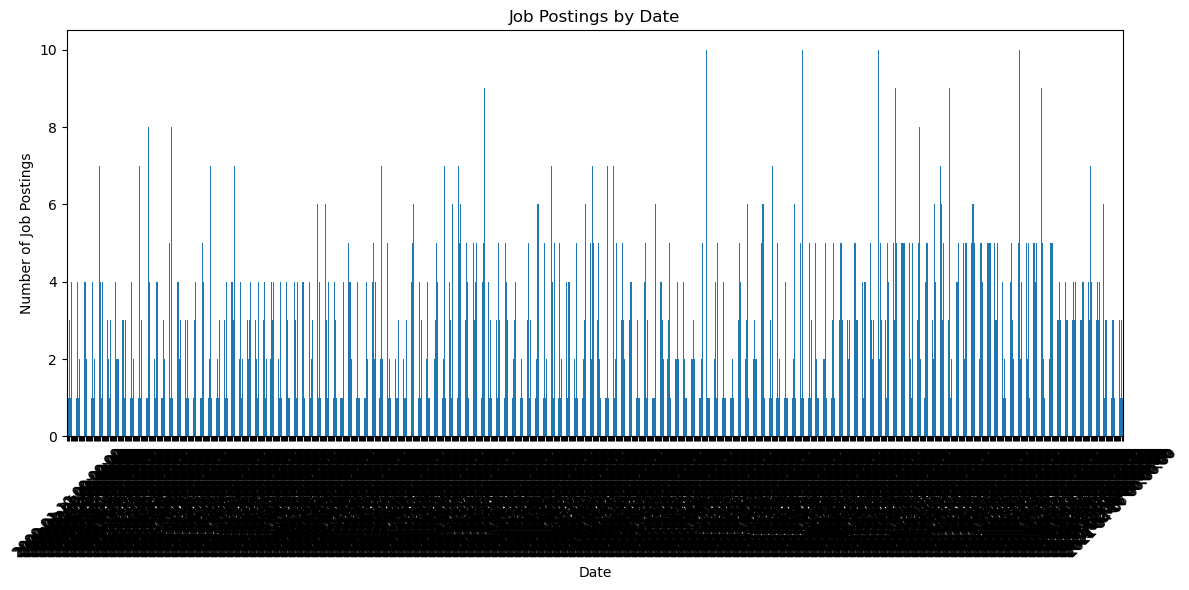

In [229]:
import matplotlib.pyplot as plt

df['date'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Job Postings by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [230]:
df.columns


Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [231]:
#Here check Water Qualtiy Indexing it find  on which date had the best water quality?

#STEP 1-> Write all Columns to use
quality_cols = ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']


In [232]:
# STEP 2-> Drop rows with missing values in selected columns and date
df_quality = df.dropna(subset=quality_cols + ['date']).copy()

In [233]:
#  STEP 3-> Normalize all values between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_quality[quality_cols])
scaled_df = pd.DataFrame(scaled_values, columns=quality_cols)

In [234]:
# STEP 4-> Invert pollutant scores (low = better), keep O2 as-is
pollutants = ['NH4', 'BSK5', 'Suspended', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
scaled_df['score'] = (1 - scaled_df[pollutants]).mean(axis=1) + scaled_df['O2']

In [235]:
# STEP 5-> Add the score back to the main dataframe
df_quality = df_quality.reset_index(drop=True)
df_quality['quality_score'] = scaled_df['score']


In [236]:
# STEP 6-> Find the date with the highest water quality
best_row = df_quality.loc[df_quality['quality_score'].idxmax()]


print("Note:- Composite Water Quality Score ranges from 0 (very poor) to 2 (excellent). A score ≥ 1.5 is considered very good, meaning low pollutant levels and high dissolved oxygen.")
print("->Best water quality was on 📅:", best_row['date'].date())
print("->Score:", round(best_row['quality_score'], 3))
print("->📊 Parameter values on that date:")
print(best_row[quality_cols])


Note:- Composite Water Quality Score ranges from 0 (very poor) to 2 (excellent). A score ≥ 1.5 is considered very good, meaning low pollutant levels and high dissolved oxygen.
->Best water quality was on 📅: 2010-03-16
->Score: 1.954
->📊 Parameter values on that date:
NH4           0.57
BSK5           6.5
Suspended     10.0
O2            90.0
NO3            7.9
NO2          0.028
SO4           47.5
PO4          0.149
CL            26.9
Name: 1790, dtype: object
